## Data Extraction

In [1]:
# Import all the necessary libraries

import json 
import csv
import pandas as pd
import numpy as np 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

from Functions import *

In [21]:
from wordcloud import WordCloud, STOPWORDS

#### Loading data from JSON files

In [2]:
# Opening maps_data and search_data JSON file and loading the data 
# into the variable serach and maps 

search = []
maps =   []

for line in open('D://Jupiter/training/maps_data.json', 'r'):
    maps.append(json.loads(line))
    
for line in open('D://Jupiter/training/search_data.json', 'r'):
    search.append(json.loads(line))

# Executing functions to extract features from the JSON format
merch_name_maps, merch_type, reviews = extract_maps(maps)
snippets,titles = extract_search(search)

#### Loading labeled data from csv file 

In [3]:
# Read merchant_labels into a DataFrame

merch_labels = pd.read_csv('D://Jupiter/training/merchant_labels.csv')

#### Merging the raw features from JSON with labelled ones from CSV 

In [4]:
# Storing the values of merchant name and type to a DataFrame

data = {'merchant_name': merch_name_maps, 'merchant_type': merch_type, 'reviews': reviews, 'snippets':snippets,
       'title':titles}
#data_search = {'merchant_name': merch_name_search}
merchant_df = pd.DataFrame(data)

In [6]:
# Join the Dataframe with features extracted from Google search with Merchant Labels

df_merged = pd.merge(merch_labels, merchant_df, on=['merchant_name'],
              how='inner')

#### Data preview

In [7]:
# Data has been extracted
# But the data is in encapsulated in a list. We need to delist it.
df_merged

,merchant_name,category,merchant_type,reviews,snippets,title
0,PONNU SUPER MARKET,Other,[Supermarket],[A popular place for all day to day items. The...,"[Ponnu Super Market, Peravallur - No 155a, Pap...","[Ponnu Super Market, Peravallur - Home | Faceb..."
1,Infinite 4,Entertainment,,,[INFINITE 4. tournament. Home · Attendees234 ·...,"[INFINITE 4 | Events - Smash.gg, Limits to Inf..."
2,CHENNAI METRO RAIL LTD,Travel,"[Corporate office, Metropolitan train company]",[This office and also the service of metro tra...,"[Hence, it is brought to the notice of the can...","[CMRL - WELCOME TO CHENNAI METRO RAIL, Chennai..."
3,SHEETAL RESTAURANT,Food & Grocery,"[South Indian restaurant, North Indian restaur...","[A regular Udupi place, good for quick food, q...",[Sheetal Restaurant Mumbai; Sheetal Restaurant...,"[Sheetal Restaurant, Khar, Mumbai - Bandra Wes..."
4,SHRI SADGURU SERVICE S,Housing,[Services],[Very rude people!!! Do not give your bike her...,[Shri Sadguru Service Station in Shivaji Nagar...,"[Shri Sadguru Service Station, Shivaji Nagar -..."
5,Ornat Foods Private Limited,Food & Grocery,,,[Ornat Foods Private Limited is a Private inco...,"[ORNAT FOODS PRIVATE LIMITED - Company, direct..."
6,JEYACHANDRAN TEXTILES,Ecommerce & Shopping,[Clothing store],[It is good place to make purchases everything...,"[Best online textile shopping in Chennai, buy ...",[Jeyachandran Textiles is one of the Best Text...
7,SHREE GOKULESH,Food & Grocery,[Gas station],[First prity good thing is service available h...,"[Shree Gokulesh Vadodara; Shree Gokulesh, Niza...","[Shree Gokulesh, Nizampura, Vadodara - Zomato,..."
8,Marine Insight,Organization,,,[Marine Insight focuses on providing informati...,"[Marine Insight - The Maritime Industry Guide,..."
9,SAI WINES,Food & Grocery,[Wine store],[All sorts of FML and IMFL available here. Sta...,"[Sai Wines in Borivali West, Mumbai is one of ...","[Sai Wines, Borivali West - Wine Retailers in ..."


#### De-listing the data

In [8]:
# De-listing the features

df_merged['merchant_type'] = df_merged['merchant_type'].apply(lambda x: de_list(x))
df_merged['reviews'] = df_merged['reviews'].apply(lambda x: de_list(x))
df_merged['snippets'] = df_merged['snippets'].apply(lambda x: de_list(x))
df_merged['title'] = df_merged['title'].apply(lambda x: de_list(x))

In [9]:
# Data Preview
df_merged

,merchant_name,category,merchant_type,reviews,snippets,title
0,PONNU SUPER MARKET,Other,Supermarket,A popular place for all day to day items. The...,"Ponnu Super Market, Peravallur - No 155a, Pap...","Ponnu Super Market, Peravallur - Home | Faceb..."
1,Infinite 4,Entertainment,,,INFINITE 4. tournament. Home · Attendees234 ·...,INFINITE 4 | Events - Smash.gg Limits to Infi...
2,CHENNAI METRO RAIL LTD,Travel,Corporate office Metropolitan train company,This office and also the service of metro tra...,"Hence, it is brought to the notice of the can...",CMRL - WELCOME TO CHENNAI METRO RAIL Chennai ...
3,SHEETAL RESTAURANT,Food & Grocery,South Indian restaurant North Indian restaura...,"A regular Udupi place, good for quick food, q...",Sheetal Restaurant Mumbai; Sheetal Restaurant...,"Sheetal Restaurant, Khar, Mumbai - Bandra Wes..."
4,SHRI SADGURU SERVICE S,Housing,Services,Very rude people!!! Do not give your bike her...,Shri Sadguru Service Station in Shivaji Nagar...,"Shri Sadguru Service Station, Shivaji Nagar -..."
5,Ornat Foods Private Limited,Food & Grocery,,,Ornat Foods Private Limited is a Private inco...,"ORNAT FOODS PRIVATE LIMITED - Company, direct..."
6,JEYACHANDRAN TEXTILES,Ecommerce & Shopping,Clothing store,It is good place to make purchases everything...,"Best online textile shopping in Chennai, buy ...",Jeyachandran Textiles is one of the Best Text...
7,SHREE GOKULESH,Food & Grocery,Gas station,First prity good thing is service available h...,"Shree Gokulesh Vadodara; Shree Gokulesh, Niza...","Shree Gokulesh, Nizampura, Vadodara - Zomato ..."
8,Marine Insight,Organization,,,Marine Insight focuses on providing informati...,Marine Insight - The Maritime Industry Guide ...
9,SAI WINES,Food & Grocery,Wine store,All sorts of FML and IMFL available here. Sta...,"Sai Wines in Borivali West, Mumbai is one of ...","Sai Wines, Borivali West - Wine Retailers in ..."


## Exploratory Data Analysis
### Insights
### Travel Category:
#### - Travel Merchants are mainly associated with gas and service stations, and even hotel and restaurant services.
#### - Merchant type contains all of the distinct features with with very less noisy words.
#### - Title/Snippets/Merchant Name also reveal important features, but have lots of noisy words like the city and random names of people.
#### - Reviews is does not looks like a very significant feature as it reveals more about the attributes of the service rather than actual service. We may get to know if the service provided by the merchant is good or bad, but not which type of service is being provided by the merchant.


In [10]:
# Number of records

print('Total number of records are: ', len(df_merged))

Total number of records are:  7013


In [10]:
# Checking missing values of Names and Types in the DataFrame

#print("Missing number of Names in Maps is: ",merchant_df[merchant_df['merchant_name'] == 'None'].count()[0])
print("Missing number of Merchant types in Maps is: ",df_merged[df_merged['merchant_type'] == ''].count()[0])
print("Missing number of reviews in Maps is: ",df_merged[df_merged['reviews'] ==''].count()[0])
print("Missing number of snippets in Search is: ",df_merged[df_merged['snippets'] ==''].count()[0])
print("Missing number of titles in Search is: ",df_merged[df_merged['title'] ==''].count()[0])

Missing number of Merchant types in Maps is:  2120
Missing number of reviews in Maps is:  3762
Missing number of snippets in Search is:  29
Missing number of titles in Search is:  29


In [11]:
# Get the count of distinct merchant Categories 

merch_labels.groupby('category').count().sort_values(by = 'merchant_name',ascending = False)

,merchant_name
category,
Travel,1520
Ecommerce & Shopping,1507
Food & Grocery,1189
Other,476
Business Activity,411
Entertainment,382
Education,321
Health & Fitness,242
Organization,226


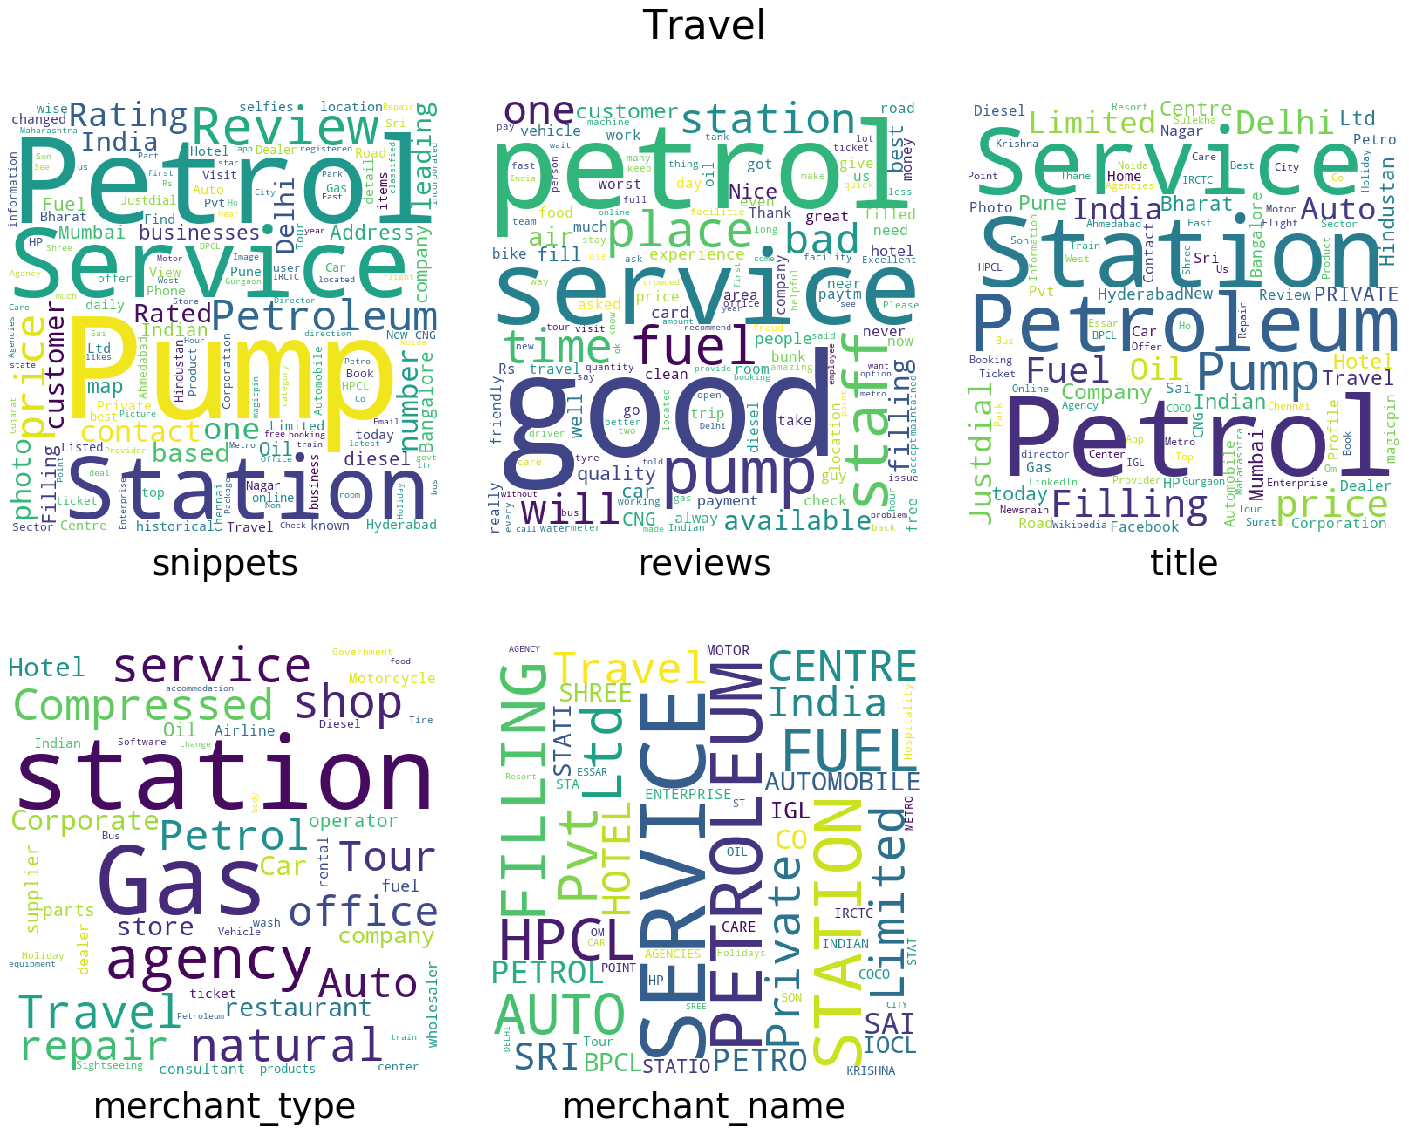

In [66]:
# Word cloud for data exploration

fig = plt.figure(figsize=(25,20))
plt.title('Travel', fontsize=40)
plt.axis('off')
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.1, hspace=0)


for i, col in enumerate(['snippets','reviews','title', 'merchant_type', 'merchant_name']):
    ax = fig.add_subplot(gs1[i])
    wordcloud = get_cloud('Travel',col)
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(col, fontsize =35, y=-0.1)
    ax.set_aspect('equal')


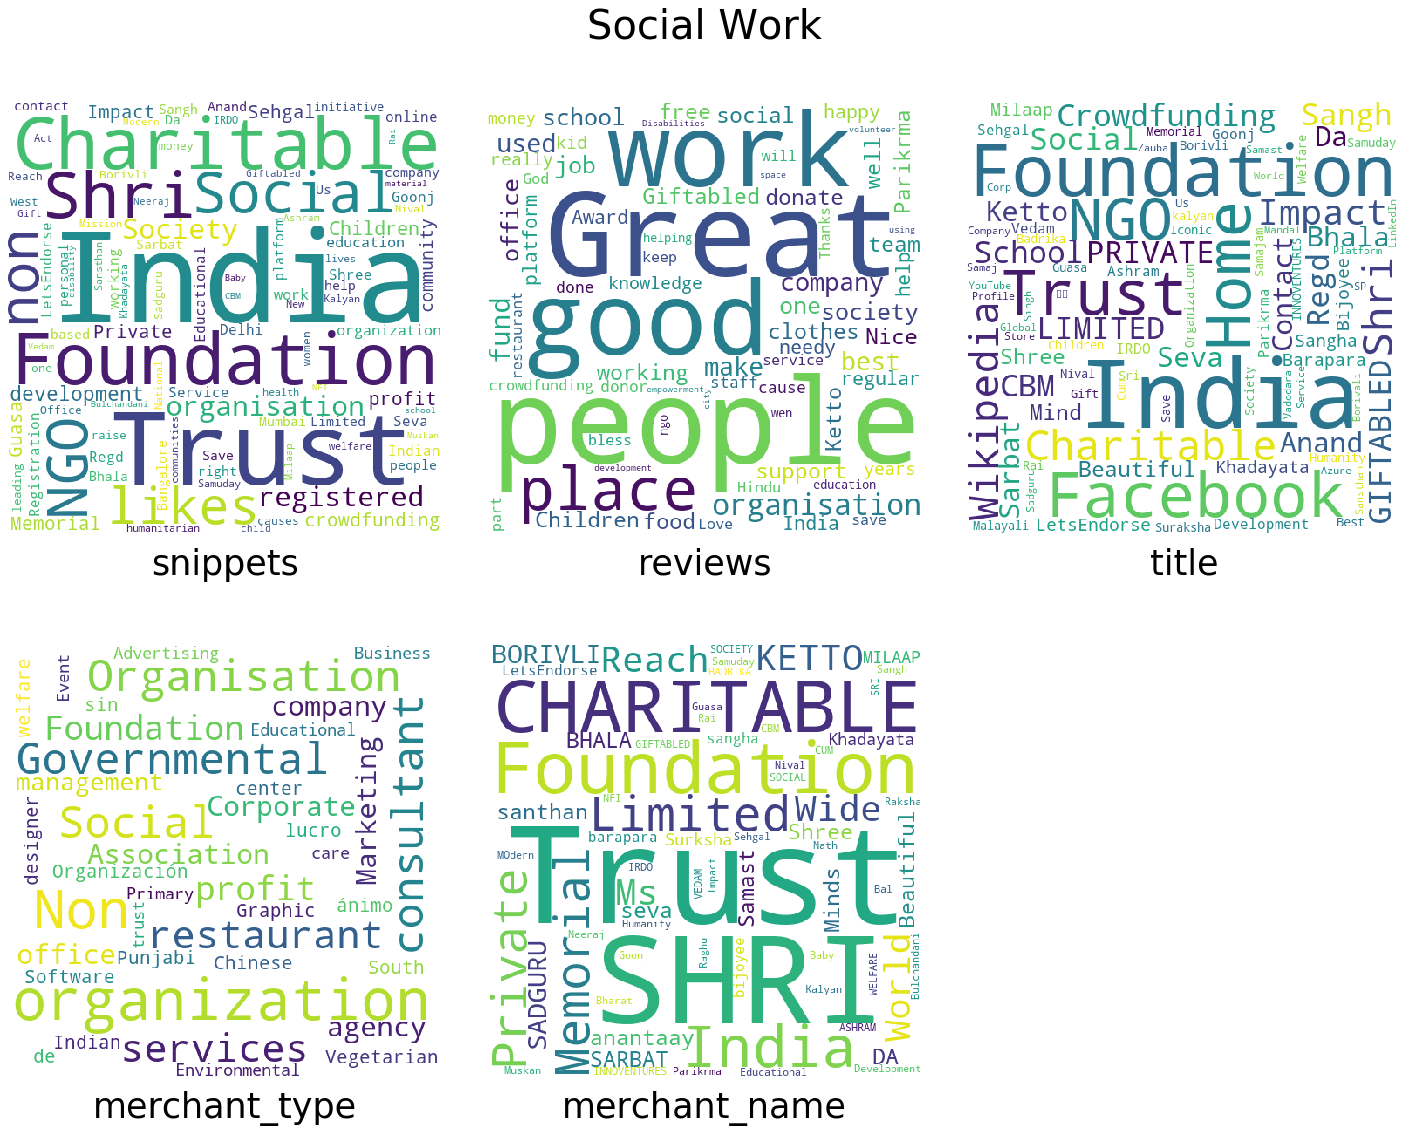

In [11]:
# Word cloud for data exploration

fig = plt.figure(figsize=(25,20))
plt.title('Social Work', fontsize=40)
plt.axis('off')
gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.1, hspace=0)


for i, col in enumerate(['snippets','reviews','title', 'merchant_type', 'merchant_name']):
    ax = fig.add_subplot(gs1[i])
    wordcloud = get_cloud('Social Work',col,df_merged,STOPWORDS)
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(col, fontsize =35, y=-0.1)
    ax.set_aspect('equal')

In [9]:
# The function combining_snip_title combines all the feature, except reviews, into one column as 'snip_title' 

df_merged['snip_title'] = df_merged.apply(lambda x: combining_snip_title(x.merchant_name,x.merchant_type,x.reviews, x.snippets, x.title), axis = 1)

In [ ]:
df_merged.to_csv(r'D://Jupiter/training/data_set.csv', index = False)